## Курсовой проект по курсу "Теория вероятностей и математическая статистика"

**Тема курсового проекта:** Логистическая регрессия

**Задачи в рамках выполнения проекта:**
- условия применимости метода проверить
- построить модель
- исследовать на статистическую значимость модель
- коэффициент детерминации

Логистическая регрессия является одним из статистических методов классификации с использованием линейного дискриминанта Фишера.

В рамках курсового проекта будет расмотрен датасет titanic из библиотеки seaborn
**Целевая переменная:** survived

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
%matplotlib inline
# plt.style.use('ggplot')

### Функция логистичесой регрессии
$$f(x) = \frac{1}{1+e^{-x}}$$

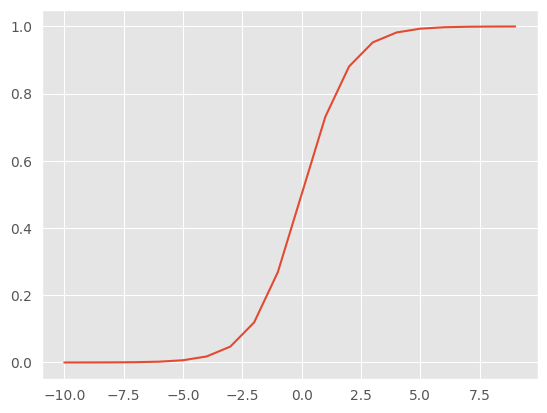

In [99]:
example_x = np.array(range(-10,10))
plt.plot(example_x, 1/(1+np.exp(-example_x)))

При нескольких независимых переменных формула будет выглядеть так:
$$y = f(\beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \beta_n \cdot x_n)$$, где
$\beta_n$ - коэфициент регрессии

## 1. Первичный анализ данных

In [100]:
dataset = load_dataset("titanic")
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


survival - выживание (0 = нет; 1 = да)
pclass - пассажирский класс (1 = Первый; 2 = Второй; 3 = Третий)
sex - пол
age - возраст
sibsp - количество сестер и братьев/супругов на борту
parch - количество родителей/детей на борту
fare - пассажирский тариф
embarked - порт посадки (C = Шербур; Q = Квинстаун; S = Саутгемптон)

In [101]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [102]:
dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
dataset.drop(['embarked','embark_town','adult_male','who','deck','alive'], axis=1, inplace=True)
dataset.dtypes

survived       int64
pclass         int64
sex           object
age          float64
sibsp          int64
parch          int64
fare         float64
class       category
alone           bool
dtype: object

In [104]:
dataset['sex'].unique()

array(['male', 'female'], dtype=object)

In [105]:
dataset['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [106]:
dataset.shape

(891, 9)

In [107]:
dataset.iloc[0]

survived        0
pclass          3
sex          male
age          22.0
sibsp           1
parch           0
fare         7.25
class       Third
alone       False
Name: 0, dtype: object

<AxesSubplot:xlabel='survived', ylabel='count'>

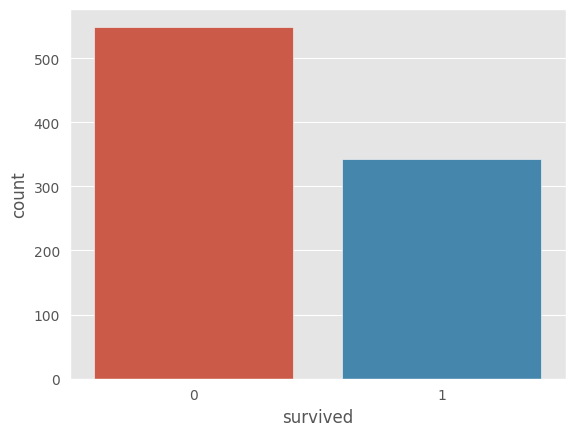

In [108]:
sns.countplot(x="survived", data = dataset)

<AxesSubplot:xlabel='survived', ylabel='count'>

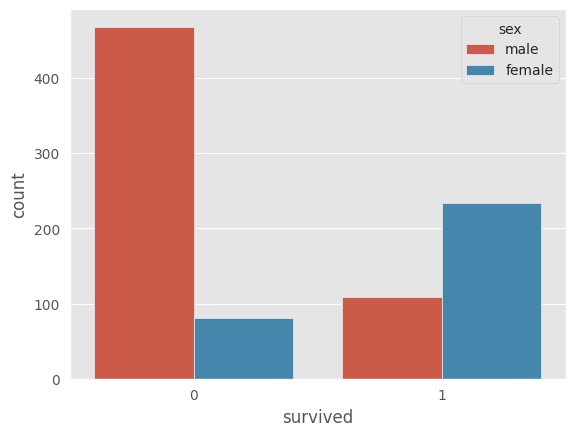

In [109]:
sns.countplot(x='survived', hue='sex', data=dataset)

<AxesSubplot:xlabel='survived', ylabel='count'>

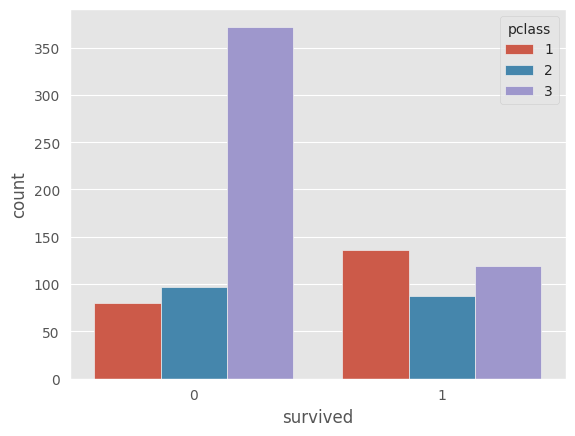

In [110]:
sns.countplot(x='survived', hue='pclass', data=dataset)

<AxesSubplot:ylabel='Frequency'>

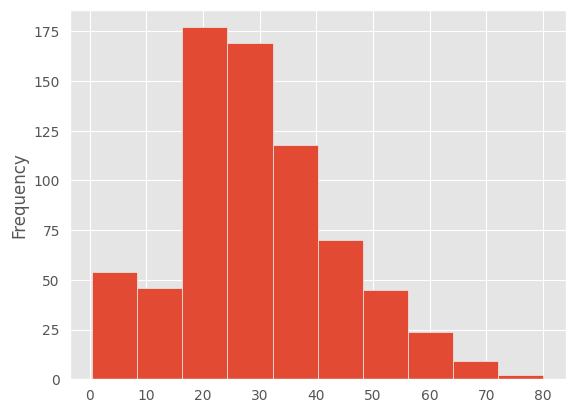

In [111]:
dataset['age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

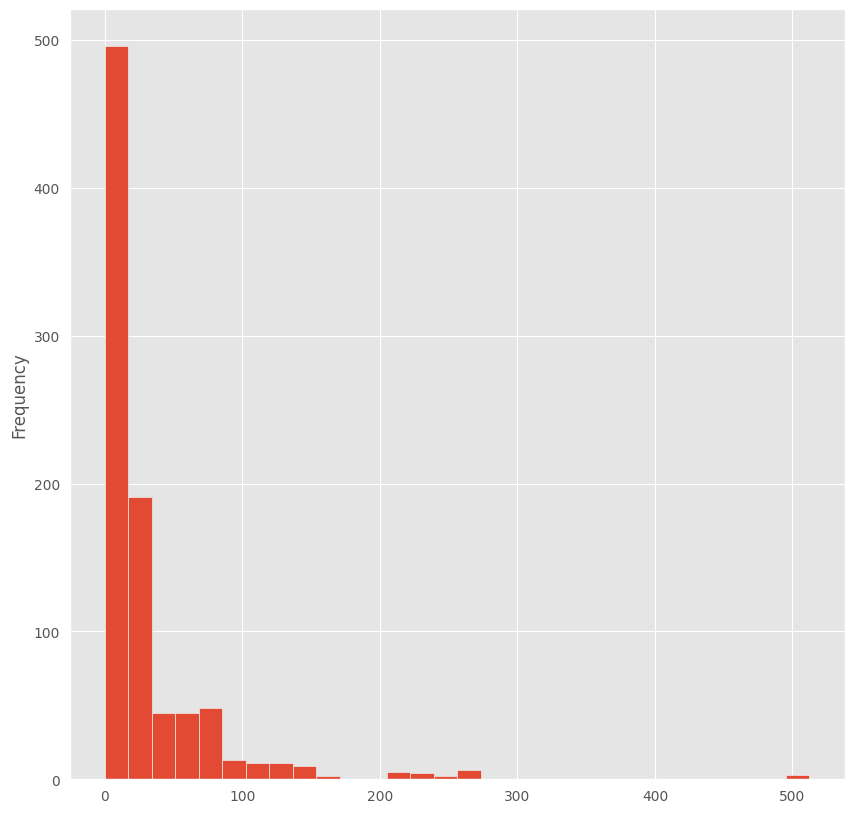

In [112]:
dataset['fare'].plot.hist(bins=30, figsize=(10,10))

In [113]:
# заменим категориальные признаки
class_dict = {'Third':3, 'First':1, 'Second':2}
sex_dict = {'male':1,'female':2}
dataset['sex'] = dataset['sex'].apply(lambda x: sex_dict[x])
dataset['class'] = dataset['class'].apply(lambda x: class_dict[x])

<AxesSubplot:>

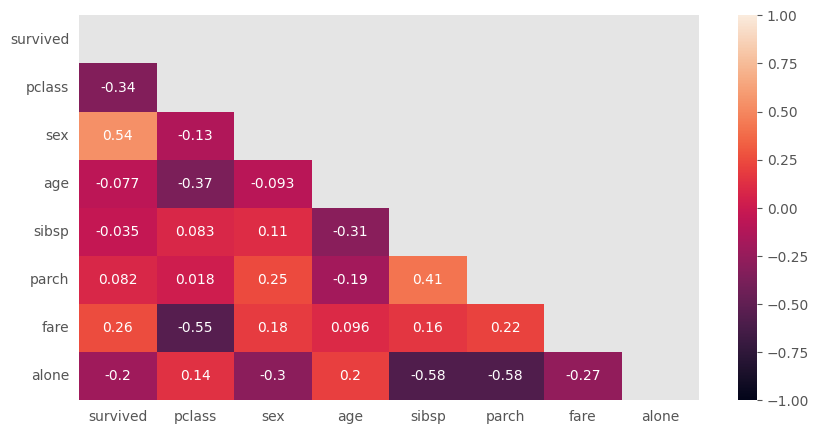

In [117]:

cor_matrix_mask = np.triu(np.ones_like(dataset.corr(), dtype=bool))
plt.figure(figsize=(10, 5))
sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True, mask=cor_matrix_mask)

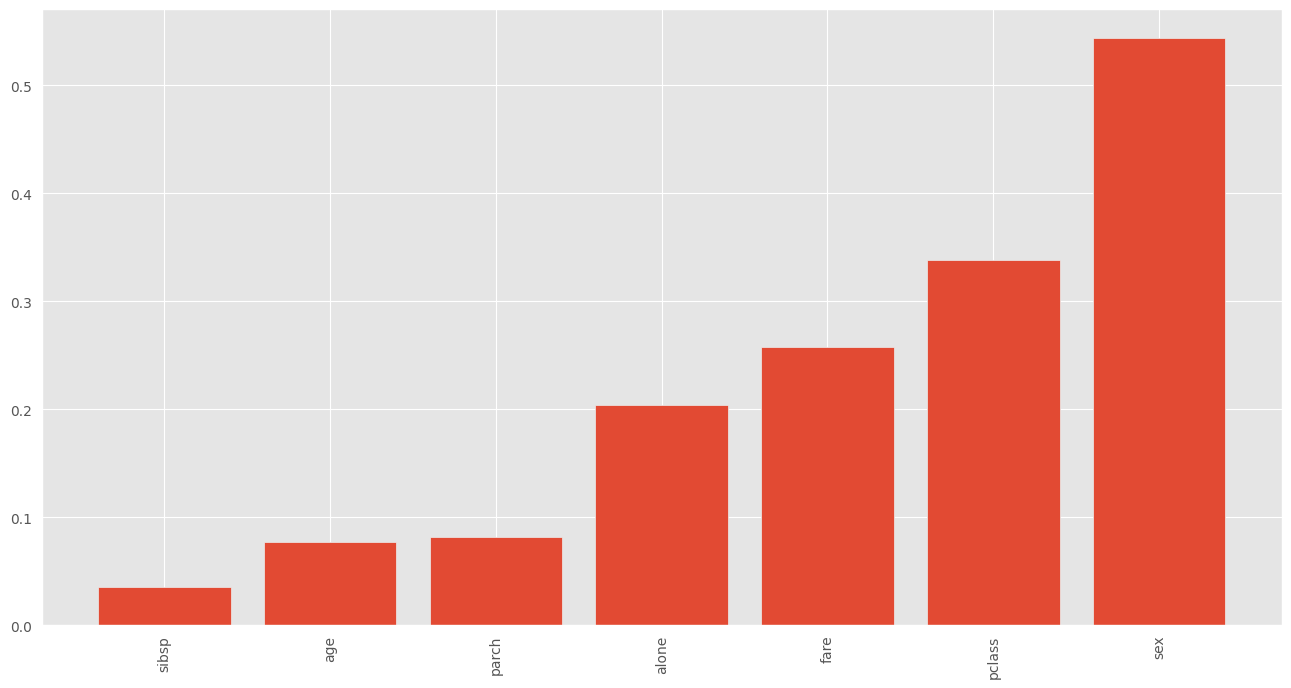

In [118]:
survived_corr = dataset.corr().abs()
survived_corr = survived_corr.unstack().sort_values()['survived']
plt.figure(figsize = (16, 8))
plt.bar(list(survived_corr.keys())[:-1], list(survived_corr)[:-1])
plt.xticks(rotation=90)
plt.show()

Найдены заметные линейные зависимости у 4 признаков alone, fare, pclass, sex

In [114]:
# Выделим целевую переменную
y = dataset['survived']
count_no_surv = len(y[y==0])
count_surv = len(y[y==1])
print("Процент не выживших", (count_no_surv/(count_no_surv+count_surv))*100)
print("Процент выживших", (count_surv/(count_no_surv+count_surv))*100)

Процент не выживших 61.61616161616161
Процент выживших 38.38383838383838


In [115]:
X = dataset.drop('survived', axis=1)
X.head()

,pclass,sex,age,sibsp,parch,fare,class,alone
0,3,1,22.0,1,0,7.2500,3,False
1,1,2,38.0,1,0,71.2833,1,False
2,3,2,26.0,0,0,7.9250,3,True
3,1,2,35.0,1,0,53.1000,1,False
4,3,1,35.0,0,0,8.0500,3,True


### 2. Построение модели